In [6]:
import pandas as pd #Load data from csv file
import matplotlib.pyplot as plt #Plotting result

from sklearn.cluster import KMeans

In [ ]:
#Importing data with Pandas library
df = pd.read_csv(r'E:/DAVID/Dataset/Adidas US Sales.csv')
df

In [26]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Unnamed: 13,Unnamed: 14,Unnamed: 15
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,0.0,0.0,0.0
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.282131,NaN,NaN,NaN
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.124141,NaN,NaN,NaN
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,1.185732e+06,35.000000,106.000000,4254.500000,1922.000000,NaN,NaN,NaN
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.500000,NaN,NaN,NaN
75%,1.185732e+06,55.000000,350.000000,150000.000000,52063.000000,NaN,NaN,NaN
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,NaN,NaN,NaN


In [27]:
#Changing column that contains date to datetime data type
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

df['Retailer ID'] = df['Retailer ID'].astype(str)

In [28]:
df['Retailer ID'] = df['Retailer ID'].astype(str)

In [30]:
#Dropping unused columns
df = df.drop('Unnamed: 13', axis = 1)
df = df.drop('Unnamed: 14', axis = 1)
df = df.drop('Unnamed: 15', axis = 1)

In [31]:
df1 = df

In [33]:
#MinMax Scaler
df1[['Units Sold_sc', 'Operating Profit_sc']] = ((df[['Units Sold', 'Operating Profit']] - df[['Units Sold', 'Operating Profit']].min())/
                                                 (df[['Units Sold', 'Operating Profit']].max() - df[['Units Sold', 'Operating Profit']].min())) * 9 + 1

In [36]:
#Making the data spesific to 2020 and in Men's Apparel only
df1 = df[df['Invoice Date'].dt.year == 2020]
df1 = df[df['Product'].str.contains("Men's Apparel")]

In [37]:
df1.describe()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Units Sold_sc,Operating Profit_sc
count,1606,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000
mean,2021-05-11 05:00:22.415940352,50.321918,190.960772,77041.489415,27872.415318,2.347958,1.643210
min,2020-01-05 00:00:00,16.000000,6.000000,252.000000,121.000000,1.042353,1.002792
25%,2021-02-17 00:00:00,42.000000,74.000000,3120.000000,1374.500000,1.522353,1.031719
50%,2021-06-04 00:00:00,50.000000,135.000000,7880.500000,3809.500000,1.952941,1.087912
75%,2021-09-16 00:00:00,59.000000,229.500000,111875.000000,36000.000000,2.620000,1.830769
max,2021-12-31 00:00:00,95.000000,925.000000,617500.000000,281250.000000,7.529412,7.490385
std,NaN,12.665713,169.997263,119488.604192,44732.847761,1.199981,1.032296


In [38]:
df1.head(100)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold_sc,Operating Profit_sc
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30%,In-store,7.352941,4.738462
10,Foot Locker,1185732,2020-01-23,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30%,Outlet,7.352941,4.738462
16,Foot Locker,1185732,2020-01-29,Northeast,New York,New York,Men's Apparel,60,850,510000,153000,30%,Outlet,7.000000,4.530769
22,Foot Locker,1185732,2020-02-04,Northeast,New York,New York,Men's Apparel,60,825,495000,148500,30%,Outlet,6.823529,4.426923
28,Foot Locker,1185732,2020-02-10,Northeast,New York,New York,Men's Apparel,60,875,525000,157500,30%,Outlet,7.176471,4.634615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,West Gear,1128299,2020-03-13,West,Nevada,Las Vegas,Men's Apparel,70,400,280000,140000,50%,In-store,3.823529,4.230769
576,West Gear,1128299,2020-03-19,West,Colorado,Denver,Men's Apparel,45,225,101250,50625,50%,In-store,2.588235,2.168269
582,West Gear,1128299,2020-03-25,West,Colorado,Denver,Men's Apparel,45,200,90000,45000,50%,In-store,2.411765,2.038462
588,West Gear,1128299,2020-03-31,West,Colorado,Denver,Men's Apparel,60,150,90000,45000,50%,In-store,2.058824,2.038462


In [55]:
#Finding the optimal cluster number using inertias and finding the elbow point
def k_opt_numb(data, max_k):
    means = []
    inertias = []    #sum square of data center and mean 

    for k in range (1, max_k):
        km = KMeans(n_clusters=k)
        km.fit(data)

        means.append(k)
        inertias.append(km.inertia_)

    #elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.title("Elbow Method")
    plt.xlabel('Clusters Number')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.savefig("Elbow point.png")
    plt.show()

In [ ]:
#Clustering With KMeans

In [41]:
#The elbow point is at 2, but for more complex result we use n cluster = 4
km = KMeans(n_clusters=4)

In [23]:
df1.head(100)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold_sc,Operating Profit_sc,km_4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30%,In-store,3.001621,2.354198,1
10,Foot Locker,1185732,2020-01-23,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30%,Outlet,3.001621,2.354198,1
16,Foot Locker,1185732,2020-01-29,Northeast,New York,New York,Men's Apparel,60,850,510000,153000,30%,Outlet,2.768238,2.188116,1
22,Foot Locker,1185732,2020-02-04,Northeast,New York,New York,Men's Apparel,60,825,495000,148500,30%,Outlet,2.651547,2.105076,1
28,Foot Locker,1185732,2020-02-10,Northeast,New York,New York,Men's Apparel,60,875,525000,157500,30%,Outlet,2.884929,2.271157,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,West Gear,1128299,2020-03-13,West,Nevada,Las Vegas,Men's Apparel,70,400,280000,140000,50%,In-store,0.667799,1.948221,2
576,West Gear,1128299,2020-03-19,West,Colorado,Denver,Men's Apparel,45,225,101250,50625,50%,In-store,-0.149038,0.298941,3
582,West Gear,1128299,2020-03-25,West,Colorado,Denver,Men's Apparel,45,200,90000,45000,50%,In-store,-0.265729,0.195140,3
588,West Gear,1128299,2020-03-31,West,Colorado,Denver,Men's Apparel,60,150,90000,45000,50%,In-store,-0.499111,0.195140,3


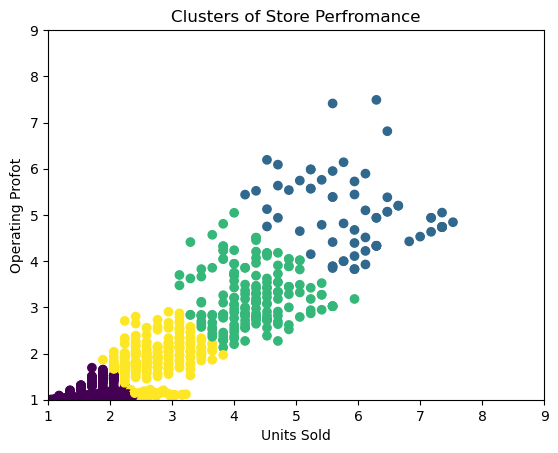

In [52]:
plt.scatter(x=df1['Units Sold_sc'], y=df1['Operating Profit_sc'], c=df1['km_4'])
plt.title("Clusters of Store Perfromance")
plt.xlabel("Units Sold")
plt.ylabel("Operating Profot")
plt.xlim(1,9)
plt.ylim(1, 9)
plt.savefig("Cluster Plot.png")
plt.show()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Units Sold_sc,Operating Profit_sc,km_4
count,1606,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000
mean,2021-05-11 05:00:22.415940352,50.321918,190.960772,77041.489415,27872.415318,2.347958,1.643210,0.947073
min,2020-01-05 00:00:00,16.000000,6.000000,252.000000,121.000000,1.042353,1.002792,0.000000
25%,2021-02-17 00:00:00,42.000000,74.000000,3120.000000,1374.500000,1.522353,1.031719,0.000000
50%,2021-06-04 00:00:00,50.000000,135.000000,7880.500000,3809.500000,1.952941,1.087912,0.000000
75%,2021-09-16 00:00:00,59.000000,229.500000,111875.000000,36000.000000,2.620000,1.830769,2.000000
max,2021-12-31 00:00:00,95.000000,925.000000,617500.000000,281250.000000,7.529412,7.490385,3.000000
std,NaN,12.665713,169.997263,119488.604192,44732.847761,1.199981,1.032296,1.280698
